In [1]:
import datacube

In [2]:
dc = datacube.Datacube(config='/home/user/.config/datacube/datacube.conf')

In [3]:
datasets = dc.find_datasets(product="esa_worldcover_2021")

print(f"Found {len(datasets)} datasets")

# Load the first dataset
ds = dc.load(datasets=datasets[0:1])

#ds = dc.load(product="esa_worldcover_2021")

Found 1 datasets


In [4]:
print(ds)

<xarray.Dataset>
Dimensions:         (time: 1, latitude: 12874, longitude: 8912)
Coordinates:
  * time            (time) datetime64[ns] 2021-07-02
  * latitude        (latitude) float64 43.17 43.17 43.17 ... 42.1 42.1 42.1
  * longitude       (longitude) float64 20.22 20.22 20.22 ... 20.96 20.96 20.96
    spatial_ref     int32 4326
Data variables:
    classification  (time, latitude, longitude) uint8 0 0 0 0 0 0 ... 0 0 0 0 0
Attributes:
    crs:           EPSG:4326
    grid_mapping:  spatial_ref


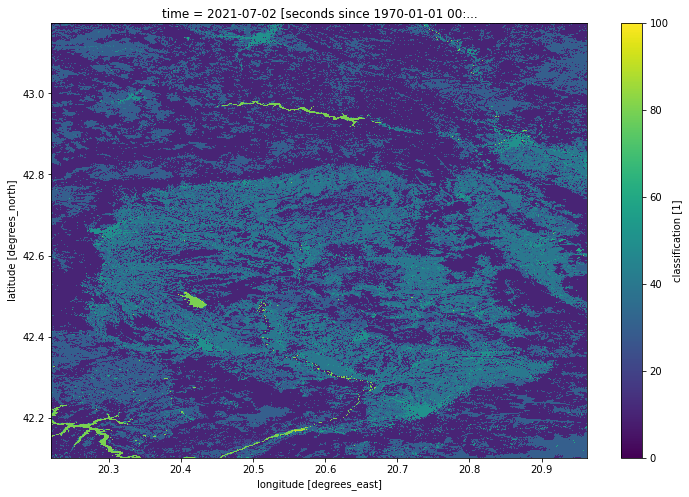

In [5]:
ds.classification.plot(size=8)

In [8]:
import numpy as np
from matplotlib import colors as mcolours

In [10]:
cmap = mcolours.ListedColormap(
  [
      np.array([0, 0, 0]) / 255,
      np.array([0, 100, 0]) / 255,
      np.array([255, 187, 34]) / 255,
      np.array([255, 255, 76]) / 255,
      np.array([240, 150, 255]) / 255,
      np.array([250, 0, 0]) / 255,
      np.array([180, 180, 180]) / 255,
      np.array([240, 240, 240]) / 255,
      np.array([0, 100, 200]) / 255,
      np.array([0, 150, 160]) / 255,
      np.array([0, 207, 117]) / 255,
      np.array([250, 230, 160]) / 255,
  ]
)

bounds = [-5, 5, 15, 25, 35, 45, 55, 65, 75, 85, 92, 98, 105]
norm = mcolours.BoundaryNorm(np.array(bounds), cmap.N)
cblabels = [
  "no data",
  "tree cover",
  "shrubland",
  "grassland",
  "cropland",
  "built up",
  "bare/sparse vegetation",
  "snow and ice",
  "permanent water bodies",
  "herbaceous wetland",
  "mangroves",
  "moss and lichen",
]

In [15]:
measure_list = dc.list_measurements()
measure_list

,,name,dtype,units,nodata,flags_definition
product,measurement,,,,,
esa_worldcover_2021,classification,classification,uint8,1,0,"{'data': {'bits': [0, 1, 2, 3, 4, 5, 6, 7], 'v..."


In [12]:
#im = ds.plot.imshow(cmap=cmap, norm=norm, add_colorbar=legend, **plot_kwargs)
##  lulc_plot
##   supposedly, that function comes from dea-africa / data_cube_utilities repo

AttributeError: '_Dataset_PlotMethods' object has no attribute 'imshow'

In [11]:
%whos

Variable   Type              Data/Info
--------------------------------------
bounds     list              n=13
cblabels   list              n=12
cmap       ListedColormap    <matplotlib.colors.Listed<...>object at 0x7f75dc25ead0>
datacube   module            <module 'datacube' from '<...>es/datacube/__init__.py'>
datasets   list              n=1
dc         Datacube          Datacube<index=Index<db=P<...>er:***@:5432/datacube)>>>
ds         Dataset           <xarray.Dataset>\nDimensi<...>rid_mapping:  spatial_ref
mcolours   module            <module 'matplotlib.color<...>es/matplotlib/colors.py'>
norm       BoundaryNorm      <matplotlib.colors.Bounda<...>object at 0x7f75dc25eb60>
np         module            <module 'numpy' from '/us<...>kages/numpy/__init__.py'>


In [16]:
print(datacube.__version__)

1.8.9
